# Diabetes prediction PIMA dataset #

Objective: Explore the dataset, data analysis and build models to predict diabetes.

Skills: Data extraction, EDA, visualization, transformation, model building and evaluation.

Tools: Pandas, Scikit-learn, Matplotlib, Seaborn and Numpy

# Data Extraction

Importing all desired libraries

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data to a dataframe

In [110]:
df_diabetes = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [111]:
df_diabetes.shape

(768, 9)

In [112]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [113]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


We can see the dataset is small scale with 768 records. Looking at the high level stats it can be ascertained that,
1. Skin Thickness
2. Insulin
The max values for these look way higher than anticipated which could possibly imply presence of outliers.

There are no null values

In [114]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [115]:
df_diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Looking at the unique values it can be seen that the outcome is a binary result. There are no categorical variables.

Univariate analysis

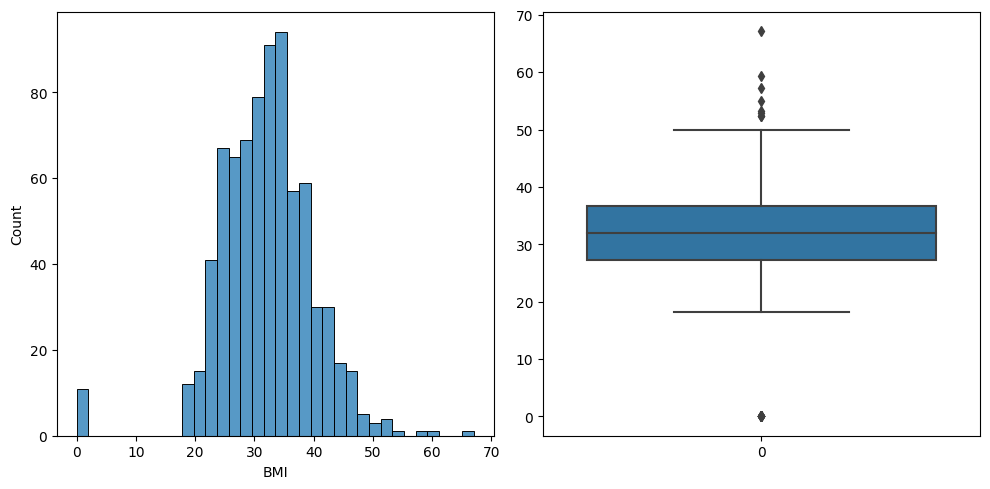

In [116]:
#BMI
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data = df_diabetes.BMI, ax = axes[0])
sns.boxplot(data = df_diabetes.BMI, ax = axes[1])
plt.tight_layout()
plt.show()

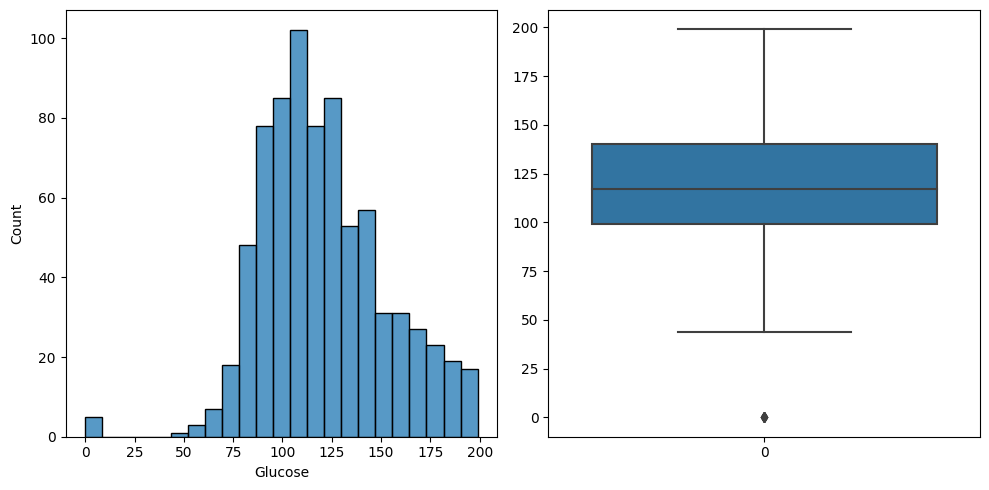

In [117]:
#Glucose
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data = df_diabetes.Glucose, ax = axes[0])
sns.boxplot(data = df_diabetes.Glucose, ax = axes[1])
plt.tight_layout()
plt.show()

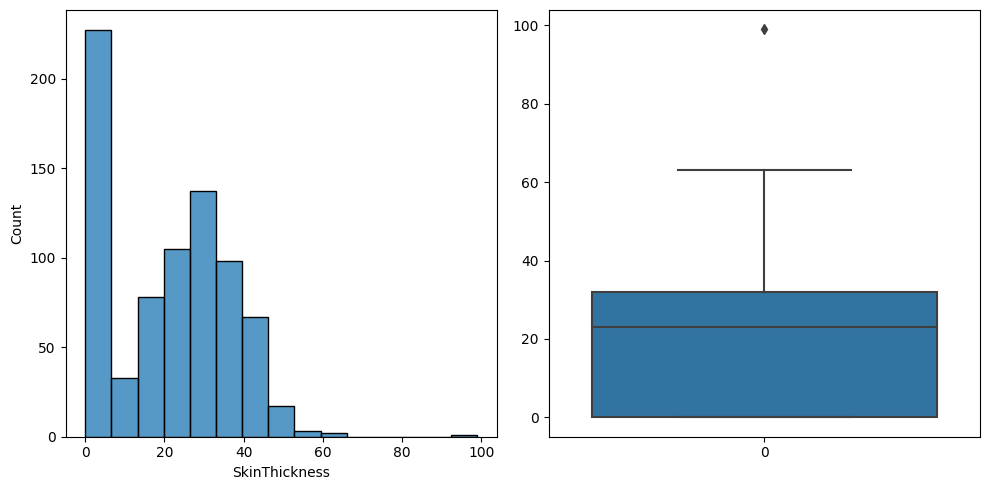

In [118]:
#Skinthickness
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data = df_diabetes.SkinThickness, ax = axes[0])
sns.boxplot(data = df_diabetes.SkinThickness, ax = axes[1])
plt.tight_layout()
plt.show()

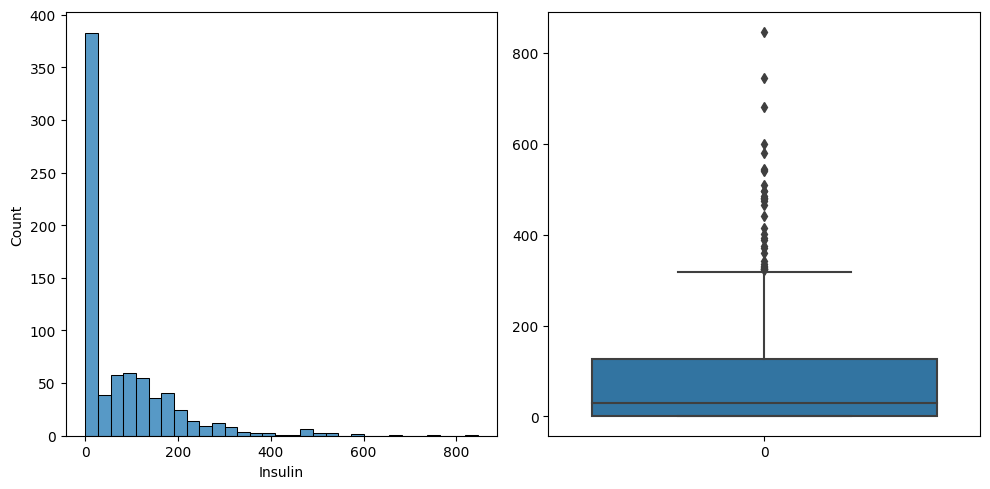

In [119]:
#Insulin
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(data = df_diabetes.Insulin, ax = axes[0])
sns.boxplot(data = df_diabetes.Insulin, ax = axes[1])
plt.tight_layout()
plt.show()

In [120]:
#Imputing outliers
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].apply(lambda x : 32 if x > 80 else x)
# df_diabetes['Insulin'] = df_diabetes['Insulin'].apply(lambda x : 127 if x > 250 else x)
df_diabetes['BMI'] = df_diabetes['BMI'].apply(lambda x :  df_diabetes['BMI'].median() if x < 20 else x)


Looking at the above graphs, it is observed that,
1. BMI has an outlier at 0 which could be due to data entry issues so it can be imputed.
2. Glucose observations looks normally distributed
3. Skin thickness looks left skewed with outlier at 100 as it is not possible so it can be imputed.
4. Insulin column is right skewed with high number of exceptional values present.

Bivariate analysis

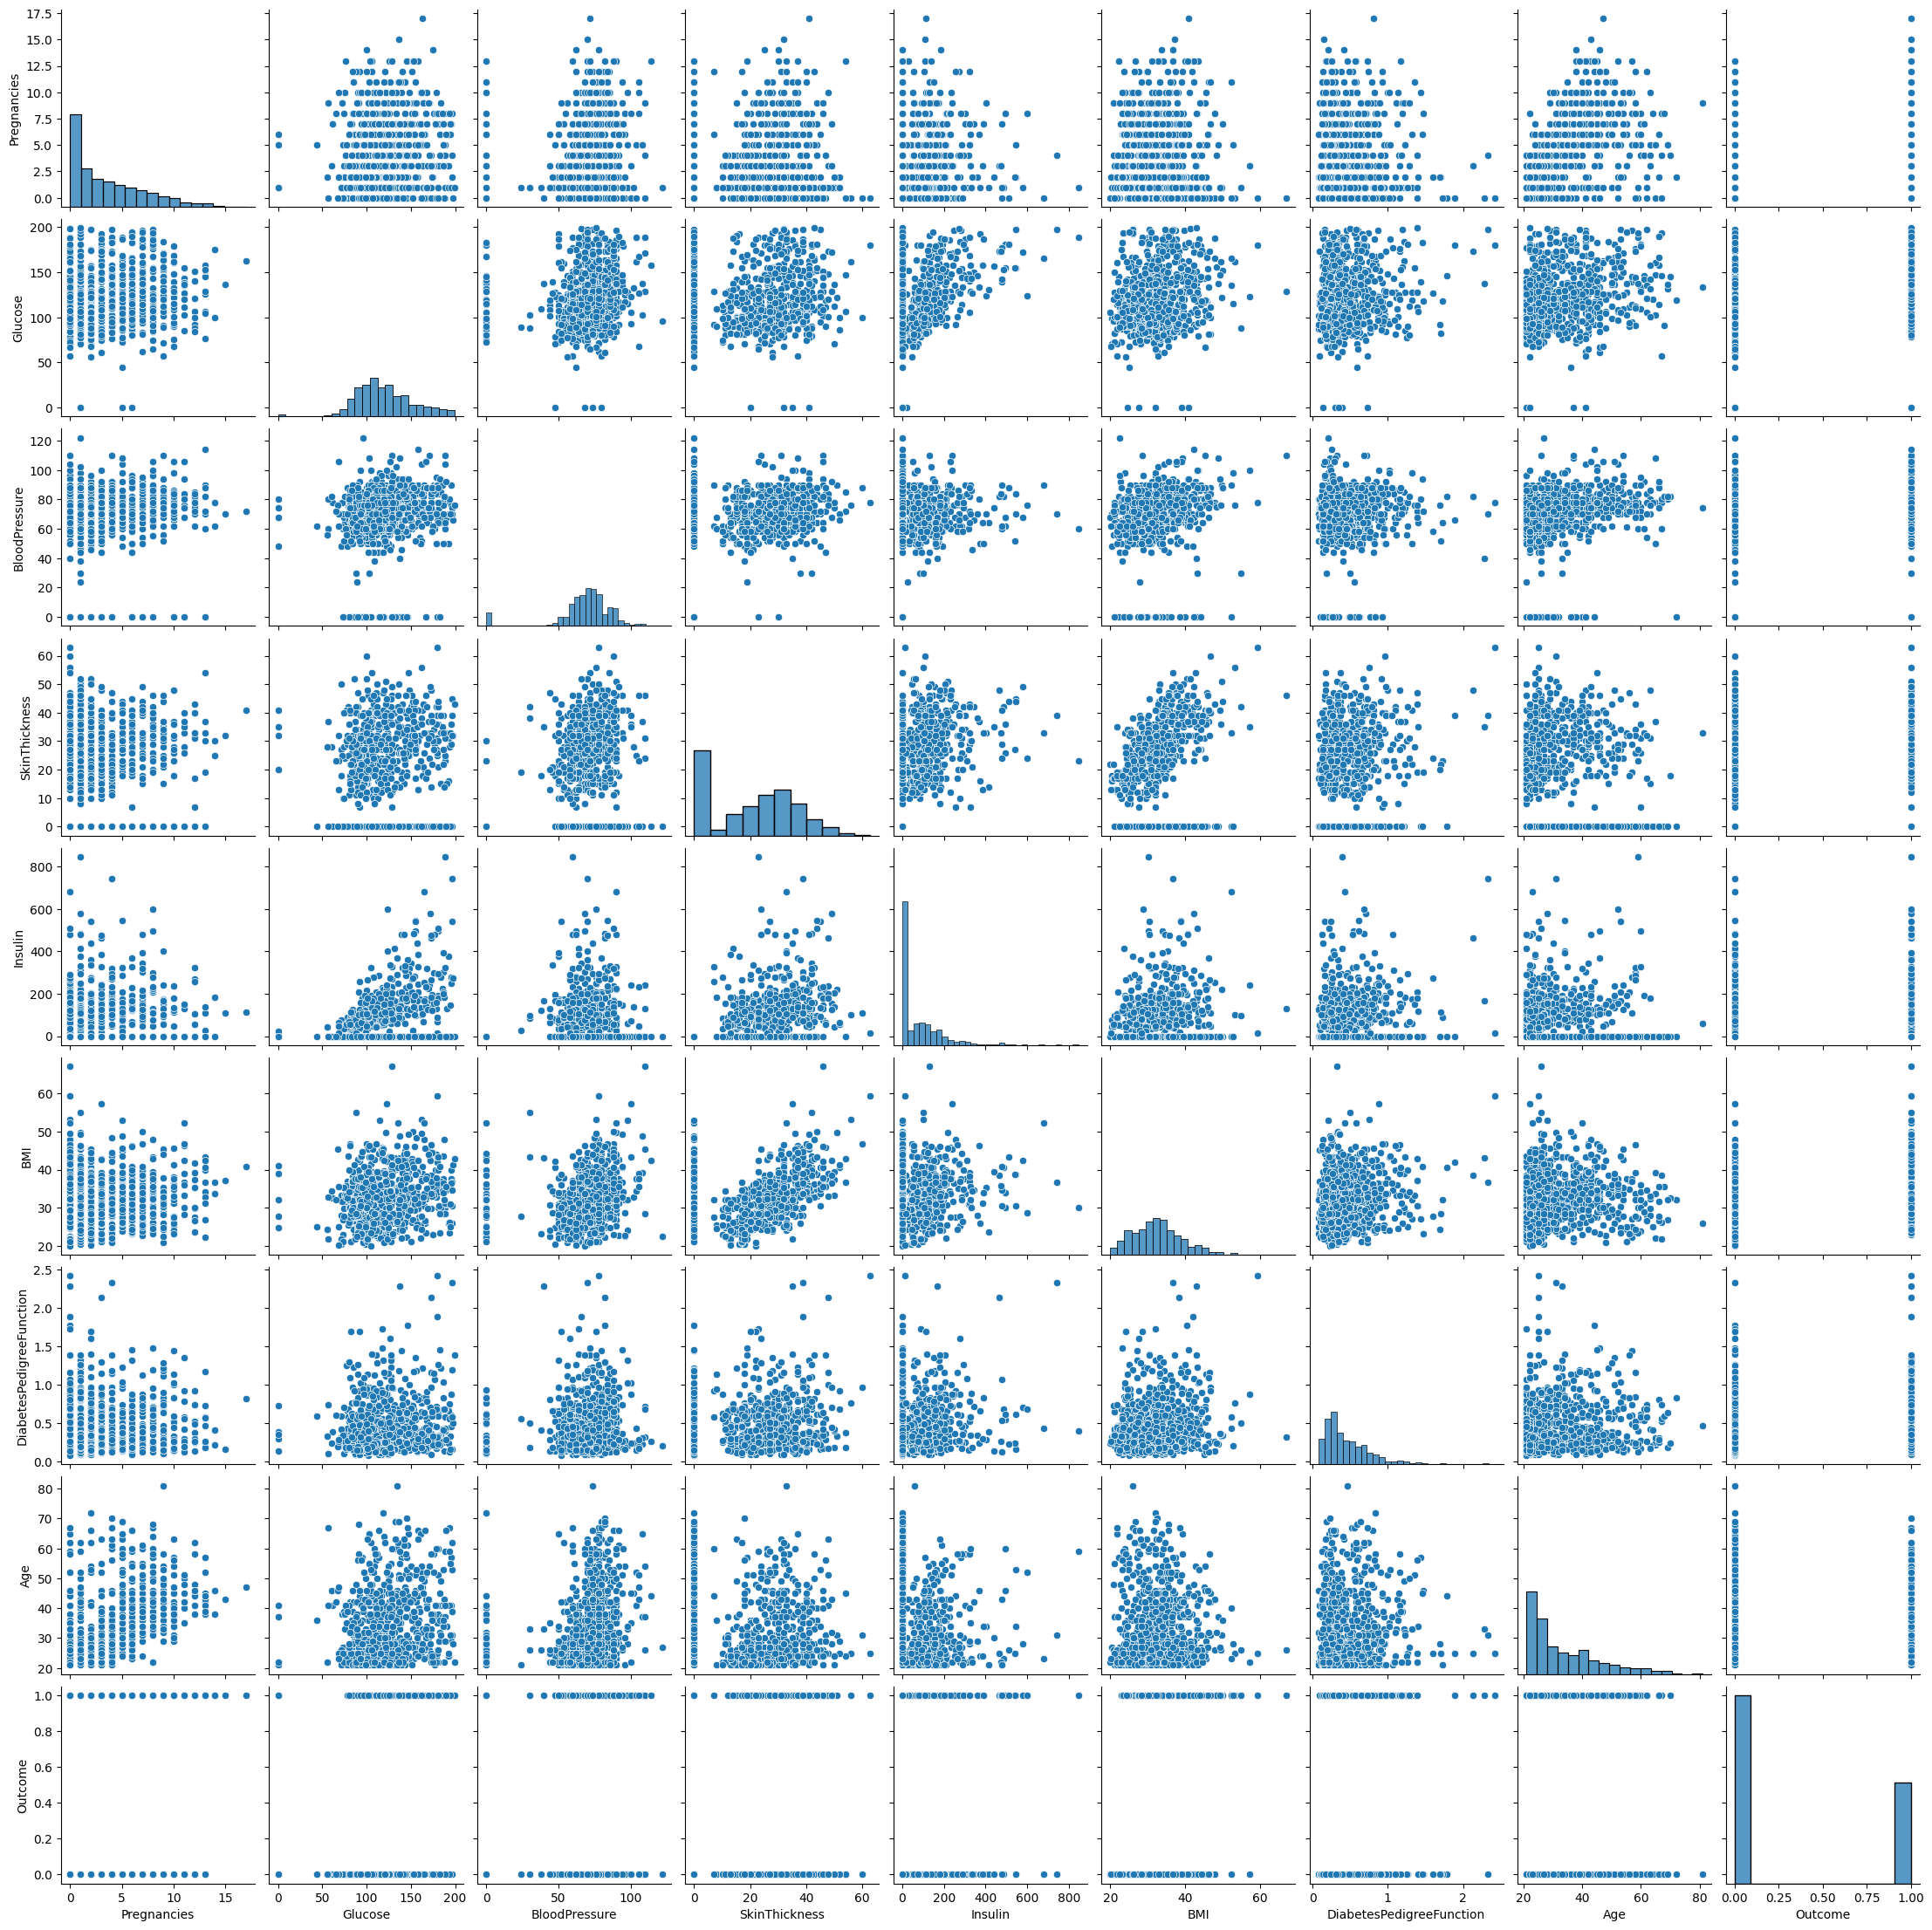

In [122]:
sns.pairplot(data = df_diabetes)
plt.show()

In [123]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.079918,-0.073535,0.003085,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.044994,0.331357,0.203820,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.210393,0.088933,0.187734,0.041265,0.239528,0.065068
SkinThickness,-0.079918,0.044994,0.210393,1.000000,0.447543,0.374547,0.185105,-0.129376,0.068342
Insulin,-0.073535,0.331357,0.088933,0.447543,1.000000,0.183527,0.185071,-0.042163,0.130548
BMI,0.003085,0.203820,0.187734,0.374547,0.183527,1.000000,0.151992,0.020432,0.298860
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.185105,0.185071,0.151992,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.129376,-0.042163,0.020432,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.068342,0.130548,0.298860,0.173844,0.238356,1.000000


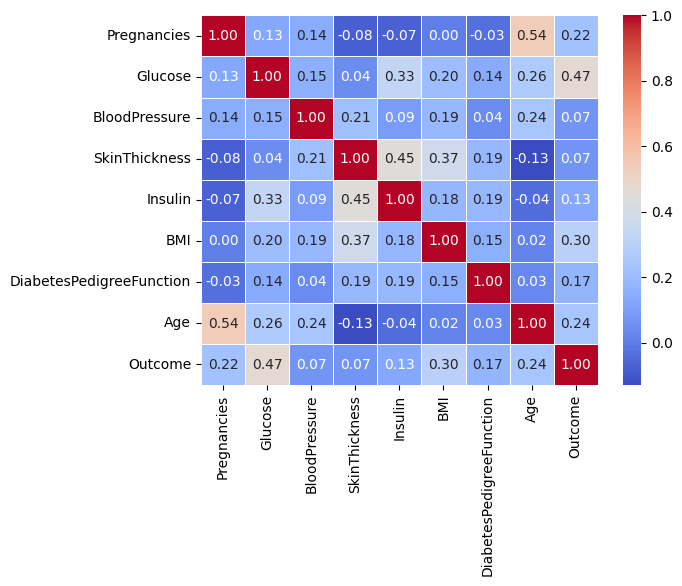

In [124]:
sns.heatmap(df_diabetes.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

Correlation matrix here shows the relationships between attributes. It can be observed that all attributes have a positive correlation with the Outcome with Glucose being the highest which makes sense. 

# Model Building

Setting up the data features and outputs.

In [125]:
X = df_diabetes.drop(columns = ['Outcome'])
y = df_diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

Using Standard scaler to scale values for appropriate analyis

In [126]:
# features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


Defining the models for comparison and evaluation. We will be evaluating 4 models,
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. XGBoost Classifier

Below code iterates through multiple n_estimator values to find the best fit for random forest

In [127]:
def model_run(model,val):
    values = {}
    for x in val:
        model_selected = model(n_estimators = x, random_state=1)
        results = -1 * cross_val_score(model_selected, X_normalized, y_train, cv = 5, scoring='neg_mean_absolute_error' )
        values[x] = results.mean()
    return min(values, key= values.get)
    
    

In [128]:
val = [10,20,30,40,50,60,70,80]
model_run(RandomForestClassifier, val)

30

In [129]:
def model_run(model,val):
    values = {}
    for x in val:
        model_selected = model(max_leaf_nodes = x, random_state=1)
        results = -1 * cross_val_score(model_selected, X_normalized, y_train, cv = 5, scoring='neg_mean_absolute_error' )
        values[x] = results.mean()
    return min(values,key = values.get)
    


In [130]:
val = [5,10,15,20,25]
model_run(DecisionTreeClassifier, val)

15

As we can found the optimal hyper parameters, we can substitute that to our prediction model function

In [131]:
model_1 = DecisionTreeClassifier(random_state = 42,max_leaf_nodes= 15)
model_2 = LogisticRegression(random_state = 42)
model_3 = RandomForestClassifier(random_state = 42,n_estimators=30)
model_4 = XGBClassifier(learning_rate=0.05, n_estimators = 500)

In [132]:
model_1.fit(X_normalized, y_train)
model_2.fit(X_normalized, y_train)
model_3.fit(X_normalized, y_train)
model_4.fit(X_normalized, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
val_dt = model_1.predict(X_test_normalized)
val_lr=model_2.predict(X_test_normalized)
val_rf=model_3.predict(X_test_normalized)
val_xgb=model_3.predict(X_test_normalized)


# Model Evaluation

In [134]:
acc_dt = accuracy_score(y_test, val_dt)
acc_lr = accuracy_score(y_test, val_lr)
acc_rf = accuracy_score(y_test, val_rf)
acc_xgb = accuracy_score(y_test, val_xgb)

In [135]:
accuracy_values = pd.DataFrame(columns=['Values'], data = [acc_dt,acc_lr,acc_rf,acc_xgb],index=['DecisionTree','Logistic','RandomForest','XGBoost'])
accuracy_values

,Values
DecisionTree,0.779221
Logistic,0.805195
RandomForest,0.772727
XGBoost,0.772727


In [136]:
pre_dt = precision_score(y_test, val_dt)
pre_lr = precision_score(y_test, val_lr)
pre_rf = precision_score(y_test, val_rf)
pre_xgb = precision_score(y_test, val_xgb)
prec_values = pd.DataFrame(columns=['Values'], data = [pre_dt,pre_lr,pre_rf,pre_xgb],index=['DecisionTree','Logistic','RandomForest','XGBoost'])
prec_values

,Values
DecisionTree,0.666667
Logistic,0.760870
RandomForest,0.711111
XGBoost,0.711111


In [137]:
rec_dt = recall_score(y_test, val_dt)
rec_lr = recall_score(y_test, val_lr)
rec_rf = recall_score(y_test, val_rf)
rec_xgb = recall_score(y_test, val_xgb)
rec_values = pd.DataFrame(columns=['Values'], data = [rec_dt,rec_lr,rec_rf,rec_xgb],index=['DecisionTree','Logistic','RandomForest','XGBoost'])
rec_values

,Values
DecisionTree,0.740741
Logistic,0.648148
RandomForest,0.592593
XGBoost,0.592593


# Conclusion


Looking at the model evaluation by finding the accuracy, precision and recall we can conclude that for this dataset, Decision Tree and Logistic Classifier is a better fit as compared to Random forest and XGBoost. This could possibly be because the dataset is considerably small thereby making simpler models work more efficiently than ensemble methods.

On further analysis between Decision Tree and Logistic Classifier, Decision Tree will be a better choice because, although logistic classifier has better accuracy rate, but when we check the recall score we can see that it is 74% which is 10% more than that of logistic classifier. 

Since in this case of healthcare sector where diabetes detection which lays more importance where missing a positive (or false negative) is more dangerous so high recall is prioritized. Hence we can conclude that Decision Tree will provide the best model for this particular use case.

